This file combines z-score data from several animals

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib
import tdt
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.signal import butter
import matplotlib.pyplot as plt
from scipy.signal import medfilt
from scipy.stats import linregress
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

Read all data files

In [ ]:
#list here the paths to your csv data files

folder_path = r"csv-example-files-Pinky"
# Get a list of all CSV files in the folder
pinky_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(".csv")]

# Liste zum Speichern der DataFrames
df_list = []

# Initialisiere den kombinierten DataFrame als leer
combined_df = pd.DataFrame()

# Schleife über alle Dateien, um sie einzulesen und den DataFrame zu kombinieren
for path in pinky_paths:
    if os.path.exists(path):  # Überprüfe, ob die Datei existiert
        print(f"Verarbeite Datei: {path}")

        # Lese die CSV-Datei in einen DataFrame ein
        df = pd.read_csv(path)

        # Überprüfe die Struktur und den Inhalt des DataFrames
        print(f"DataFrame-Info für {path}:")
        print(df.info())
        print(df.head())  # Zeigt die ersten Zeilen des DataFrames an

        # Überprüfe, ob der DataFrame leer ist
        if not df.empty:
            # Kombiniere den aktuellen DataFrame mit dem kombinierten DataFrame
            combined_df = pd.concat([combined_df, df], axis=0, ignore_index=True)
        else:
            print(f"Leerer DataFrame: {path}")
    else:
        print(f"Datei nicht gefunden: {path}")

# Konvertiere den kombinierten DataFrame in ein NumPy-Array
pinky_array = combined_df.to_numpy()

Verarbeite Datei: /Users/mass/Documents/Dokumente - mass MacBook Air/W2-Bremen/PinkyCaMP/Nature Methods/FibPho/EZM/Pinky-only/closed-to-open/PinkyCaMP/0819-240912-145932_Pinky_data-closed-to-open.csv
DataFrame-Info für /Users/mass/Documents/Dokumente - mass MacBook Air/W2-Bremen/PinkyCaMP/Nature Methods/FibPho/EZM/Pinky-only/closed-to-open/PinkyCaMP/0819-240912-145932_Pinky_data-closed-to-open.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Columns: 10173 entries, Pinky_0 to Pinky_10172
dtypes: float64(10173)
memory usage: 635.9 KB
None
    Pinky_0   Pinky_1   Pinky_2   Pinky_3   Pinky_4   Pinky_5   Pinky_6  \
0 -0.360526 -0.357475 -0.354652 -0.352061 -0.349704 -0.347584 -0.345703   
1  0.953881  0.960588  0.967312  0.974043  0.980771  0.987486  0.994178   
2 -0.261771 -0.259366 -0.257006 -0.254696 -0.252440 -0.250242 -0.248109   
3  1.734073  1.748121  1.762232  1.776395  1.790602  1.804841  1.819103   
4  0.564009  0.559766  0.555481  0.551159  0.546802  0.54

Read control data


In [ ]:
# read the path to the control data

folder_path = r"csv-example-files-control"
# Get a list of all CSV files in the folder
control_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(".csv")]

# Liste zum Speichern der DataFrames
control_df_list = []

# Initialisiere den kombinierten DataFrame als leer
control_combined_df = pd.DataFrame()

# Schleife über alle Dateien, um sie einzulesen und den DataFrame zu kombinieren
for path in control_paths:
    if os.path.exists(path):  # Überprüfe, ob die Datei existiert
        print(f"Verarbeite Datei: {path}")

        # Lese die CSV-Datei in einen DataFrame ein
        df = pd.read_csv(path)

        # Überprüfe die Struktur und den Inhalt des DataFrames
        print(f"DataFrame-Info für {path}:")
        print(df.info())
        print(df.head())  # Zeigt die ersten Zeilen des DataFrames an

        # Überprüfe, ob der DataFrame leer ist
        if not df.empty:
            # Kombiniere den aktuellen DataFrame mit dem kombinierten DataFrame
            control_combined_df = pd.concat(
                [control_combined_df, df], axis=0, ignore_index=True
            )
        else:
            print(f"Leerer DataFrame: {path}")
    else:
        print(f"Datei nicht gefunden: {path}")

# Konvertiere den kombinierten DataFrame in ein NumPy-Array
control_array = control_combined_df.to_numpy()


Verarbeite Datei: /Users/mass/Documents/Dokumente - mass MacBook Air/W2-Bremen/PinkyCaMP/Nature Methods/FibPho/EZM/sDarken-Pinky/Control/open-to-closed/0870-240924-152723_final_EZM_control_200µm_Pinky_data-open-to-closed.csv
DataFrame-Info für /Users/mass/Documents/Dokumente - mass MacBook Air/W2-Bremen/PinkyCaMP/Nature Methods/FibPho/EZM/sDarken-Pinky/Control/open-to-closed/0870-240924-152723_final_EZM_control_200µm_Pinky_data-open-to-closed.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Columns: 10173 entries, Pinky_0 to Pinky_10172
dtypes: float64(10173)
memory usage: 635.9 KB
None
    Pinky_0   Pinky_1   Pinky_2   Pinky_3   Pinky_4   Pinky_5   Pinky_6  \
0  1.027342  1.023004  1.018642  1.014260  1.009860  1.005446  1.001022   
1  0.899978  0.916631  0.933099  0.949359  0.965389  0.981166  0.996667   
2  1.990734  1.990785  1.990653  1.990352  1.989894  1.989290  1.988553   
3  0.303178  0.303989  0.304808  0.305631  0.306458  0.307285  0.308111   
4  0.64

Plot in individual plots for control and recording 

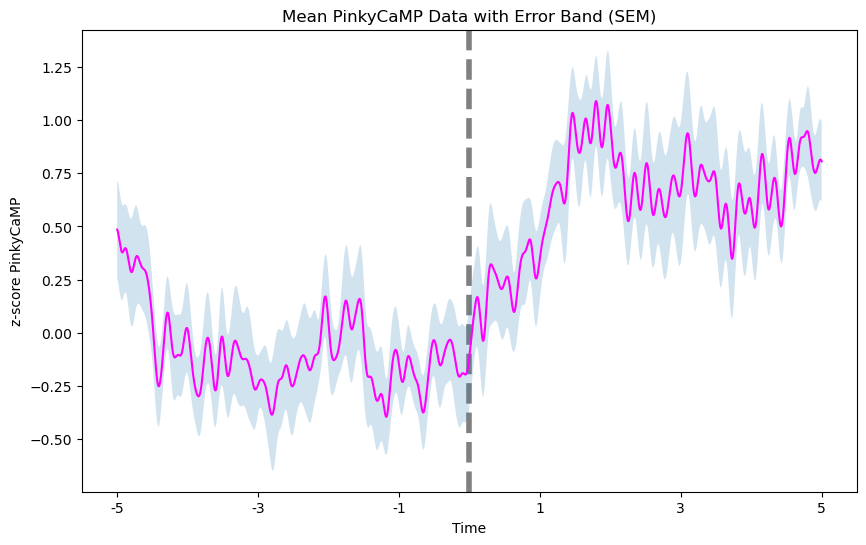

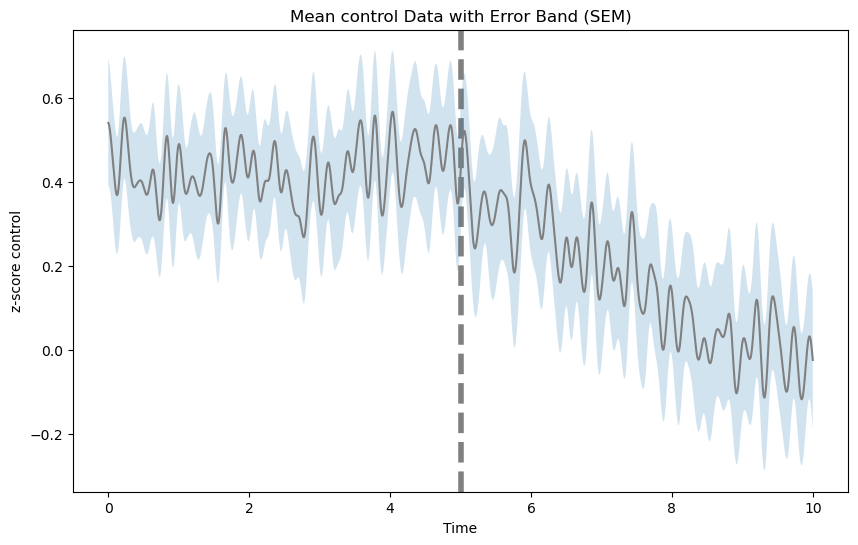

In [7]:
# Definiere die Abtastrate und die Gesamtdauer
sampling_rate = 1017.25  # SAmpling rate TDT
duration = 10  # Dauer des Signals in Sekunden 10 der 30

# Erstelle den Zeitvektor
time_vector = np.arange(0, duration, 1 / sampling_rate)

# Remove the last column for the 30s
#time_vector = time_vector[:-1]


mean_Pinky_event = np.mean(pinky_array, axis=0)
sem_Pinky = np.std(pinky_array, axis=0) / np.sqrt(len(pinky_array))


plt.figure(figsize=(10, 6))
plt.plot(time_vector, mean_Pinky_event, "magenta", label="Mean Pinky  Data", zorder=3)
plt.fill_between(
    time_vector,
    mean_Pinky_event - sem_Pinky,
    mean_Pinky_event + sem_Pinky,
    alpha=0.2,
    label="SEM",
    zorder=2,
)

plt.xlabel("Time")
# Set x-axis labels from -5 to 5
plt.xticks(ticks=[0, 2, 4, 6, 8, 10], labels=["-5", "-3", "-1", "1", "3", "5"])

# Add a grey vertical line at timepoint zero
plt.axvline(x=5, color="grey", linestyle="--", linewidth=4, zorder=1)
# Use ax to set y-limits (instead of plt.ylim)
ax = plt.gca()  # Get current axis
#ax.set_ylim(-1, 1)
#ax.set_xlim(2,8)
plt.ylabel("z-score PinkyCaMP", fontsize=10)
plt.title("Mean PinkyCaMP Data with Error Band (SEM)")
# plt.legend()
#plt.grid(True)
plt.show()


mean_control_event = np.mean(control_array, axis=0)
sem_control = np.std(control_array, axis=0) / np.sqrt(len(control_array))



plt.figure(figsize=(10, 6))
plt.plot(
    time_vector, mean_control_event, "grey", label="Mean control  Data", zorder=3
)
plt.fill_between(
    time_vector,
    mean_control_event - sem_control,
    mean_control_event + sem_control,
    alpha=0.2,
    label="SEM",
    zorder=2,
)

plt.xlabel("Time")
# Set x-axis labels from -5 to 5
#plt.xticks(ticks=[0, 2, 4, 6, 8, 10], labels=["-5", "-3", "-1", "1", "3", "5"])

# Add a grey vertical line at timepoint zero
plt.axvline(x=5, color="grey", linestyle="--", linewidth=4, zorder=1)

# Use ax to set y-limits (instead of plt.ylim)
#ax = plt.gca()  # Get current axis
#ax.set_ylim(-1, 1)
#ax.set_xlim(2,8)

plt.ylabel("z-score PinkyCaMP", fontsize=10)
plt.ylabel("z-score control", fontsize=10)
plt.title("Mean control Data with Error Band (SEM)")
# plt.legend()
# plt.grid(True)
plt.show()

Combine in them in  one plot

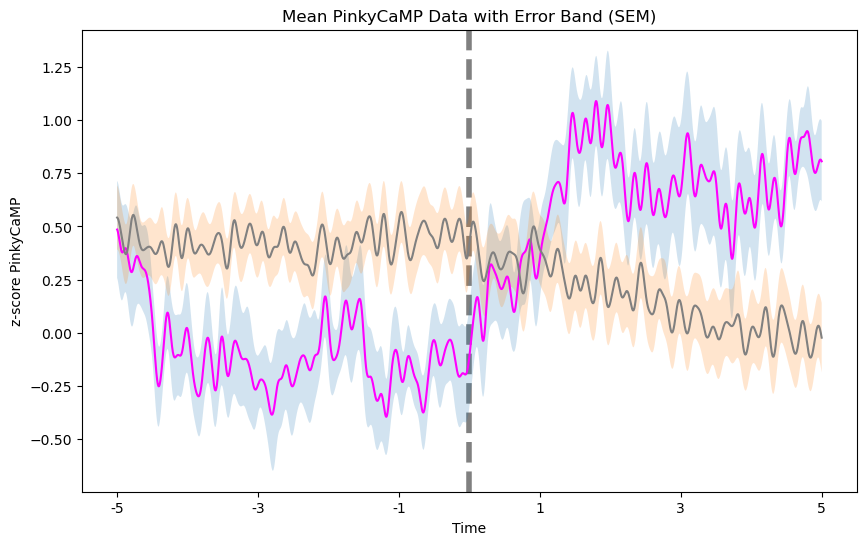

In [8]:
# Combine in one plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(time_vector, mean_Pinky_event, "magenta", label="Mean Pinky  Data", zorder=3)
plt.fill_between(
    time_vector,
    mean_Pinky_event - sem_Pinky,
    mean_Pinky_event + sem_Pinky,
    alpha=0.2,
    label="SEM",
    zorder=2,
)
plt.plot(time_vector, mean_control_event, "grey", label="Mean control Data", zorder=3)
plt.fill_between(
    time_vector,
    mean_control_event - sem_control,
    mean_control_event + sem_control,
    alpha=0.2,
    label="SEM",
    zorder=2,
)
plt.xlabel("Time")
# Set x-axis labels from -5 to 5
plt.xticks(ticks=[0, 2, 4, 6, 8, 10], labels=["-5", "-3", "-1", "1", "3", "5"])

# Add a grey vertical line at timepoint zero
plt.axvline(x=5, color="grey", linestyle="--", linewidth=4, zorder=1)

plt.ylabel("z-score PinkyCaMP", fontsize=10)
plt.title("Mean PinkyCaMP Data with Error Band (SEM)")

# Use ax to set y-limits (instead of plt.ylim)
ax = plt.gca()  # Get current axis
#ax.set_ylim(-1, 1)
#ax.set_xlim(2,8)

plt.savefig("/Users/mass/Documents/Dokumente - mass MacBook Air/W2-Bremen/pinkyCaMP/Nature Methods/FibPho/combined.svg", format="svg")
plt.show()

Make a heatmap

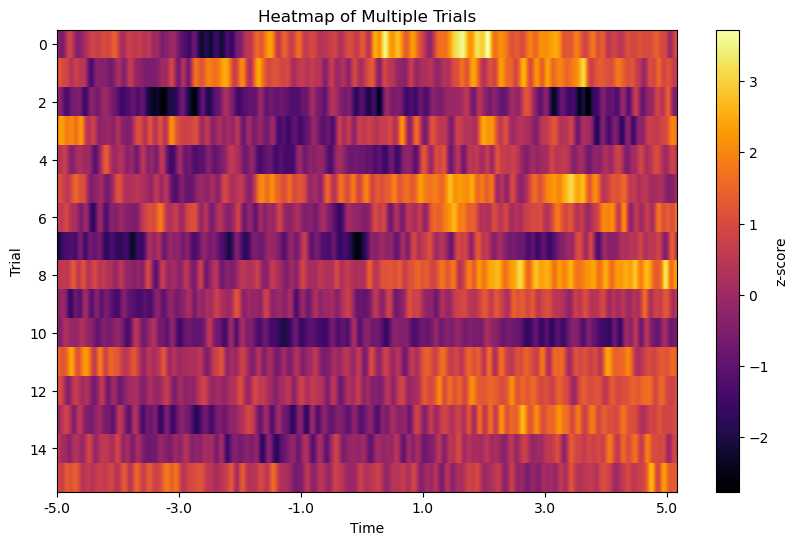

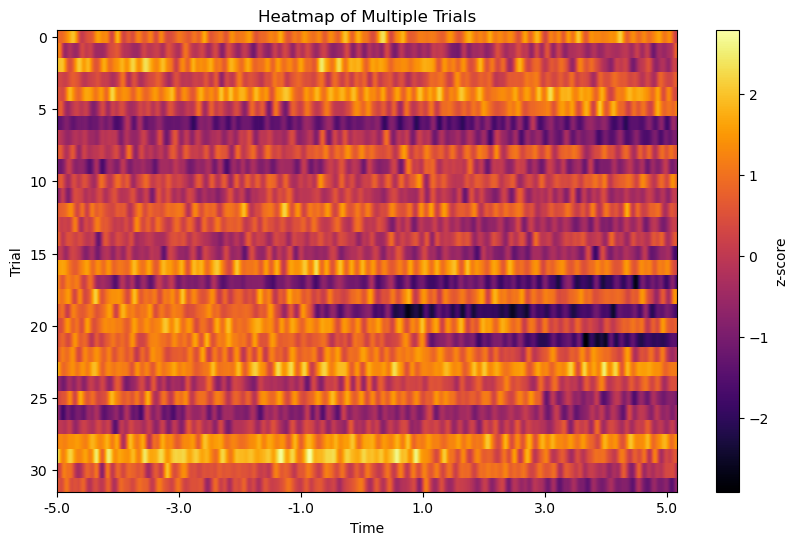

In [9]:
# Heatmap PinkyCaMP
plt.figure(figsize=(10, 6))
plt.imshow(pinky_array, aspect="auto", cmap="inferno", interpolation="nearest")
# cbar = fig.colorbar(cs, pad=0.01, fraction=0.02)
plt.colorbar(label="z-score")
# Define and set x-ticks and labels
# Here we map data range to label range -5 to 5
x_ticks = np.linspace(0, 10000, num=6)  # Create ticks from 0 to 10000
x_labels = np.linspace(-5, 5, num=6)  # Corresponding labels

plt.xticks(ticks=x_ticks, labels=x_labels)  # Set tick positions  # Set tick labels
plt.xlabel("Time")
plt.ylabel("Trial")
plt.title("Heatmap of Multiple Trials")
plt.savefig("/Users/mass/Documents/Dokumente - mass MacBook Air/W2-Bremen/pinkyCaMP/Nature Methods/FibPho/heatmap.svg", format="svg")
plt.show()

# Heatmap Control
plt.figure(figsize=(10, 6))
plt.imshow(control_array, aspect="auto", cmap="inferno", interpolation="nearest")
#plt.imshow(control_array, aspect="auto", cmap="inferno", interpolation="nearest")
# cbar = fig.colorbar(cs, pad=0.01, fraction=0.02)
plt.colorbar(label="z-score")
# Define and set x-ticks and labels
# Here we map data range to label range -5 to 5
x_ticks = np.linspace(0, 10000, num=6)  # Create ticks from 0 to 10000
x_labels = np.linspace(-5, 5, num=6)  # Corresponding labels

plt.xticks(ticks=x_ticks, labels=x_labels)  # Set tick positions  # Set tick labels
plt.xlabel("Time")
plt.ylabel("Trial")
plt.title("Heatmap of Multiple Trials")
plt.savefig("/Users/mass/Documents/Dokumente - mass MacBook Air/W2-Bremen/pinkyCaMP/Nature Methods/FibPho/heatmap-control.svg", format="svg")
plt.show()


Apply the same scaling for both heatmap

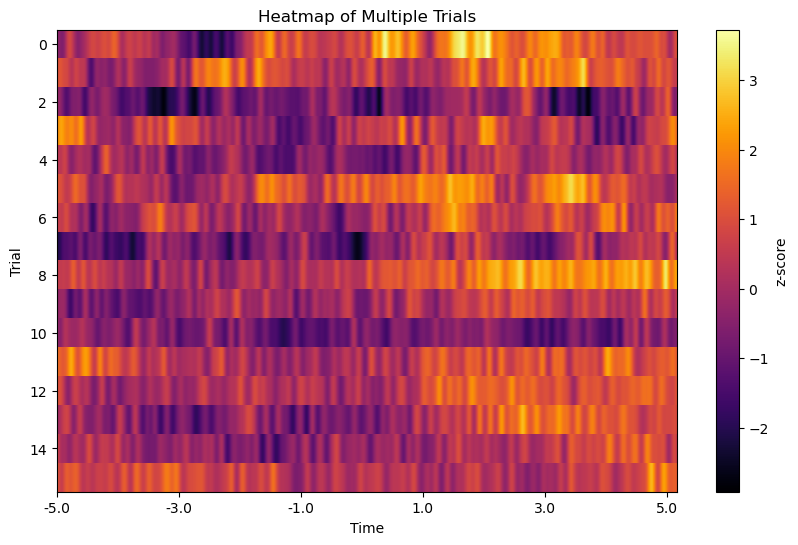

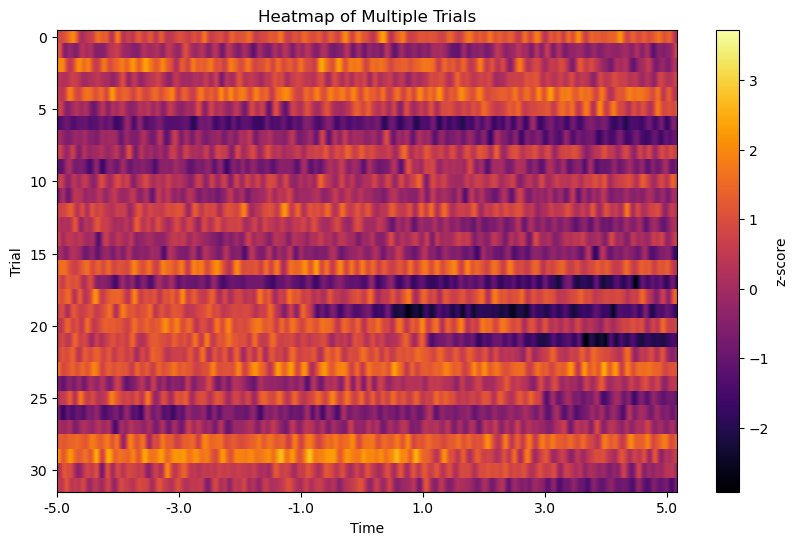

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Assume pinky_array and control_array are already defined
# Determine the overall min and max values
overall_min = min(pinky_array.min(), control_array.min())
overall_max = max(pinky_array.max(), control_array.max())

def plot_heatmap(data_array, title, file_path, cmap='inferno'):
    plt.figure(figsize=(10, 6))
    plt.imshow(data_array, aspect="auto", cmap=cmap, 
               interpolation="nearest", vmin=overall_min, vmax=overall_max)
    plt.colorbar(label="z-score")
    
    # Define and set x-ticks and labels
    x_ticks = np.linspace(0, 10000, num=6)  # Create ticks from 0 to 10000
    x_labels = np.linspace(-5, 5, num=6)    # Corresponding labels
    plt.xticks(ticks=x_ticks, labels=x_labels)
    
    plt.xlabel("Time")
    plt.ylabel("Trial")
    plt.title(title)
    plt.savefig(file_path, format="svg")
    plt.show()

# Plot heatmaps with the same scaling
plot_heatmap(pinky_array, "Heatmap of Multiple Trials", 
              "/Users/mass/Documents/Dokumente - mass MacBook Air/W2-Bremen/pinkyCaMP/Nature Methods/FibPho/heatmap.svg", cmap='inferno')

plot_heatmap(control_array, "Heatmap of Multiple Trials", 
              "/Users/mass/Documents/Dokumente - mass MacBook Air/W2-Bremen/pinkyCaMP/Nature Methods/FibPho/heatmap-control.svg", cmap='inferno')


Save the combined data

In [ ]:
import pandas as pd
import numpy as np
import os
BLOCKPATH = "" #add the desired path here

# Konvertiere Listen in NumPy-Arrays
pinky_event_array = np.array(pinky_array)
#mean_sem_pinky_event_array = np.array(sem_Pinky)

control_event_array = np.array(control_array)
#mean_sem_control_array = np.array(sem_control)

# Erstelle DataFrames für jede Datenquelle
df_pinky = pd.DataFrame(
   pinky_event_array,
    columns=[f"Pinky_{i}" for i in range(pinky_event_array.shape[1])]
)
df_control = pd.DataFrame(
    control_event_array,
    columns=[f"control_{i}" for i in range(control_event_array.shape[1])]
)

# Überprüfen, ob das Verzeichnis existiert und ggf. erstellen
directory = os.path.dirname(BLOCKPATH)
if not os.path.exists(directory):
    os.makedirs(directory)

# Dateinamen für jede CSV-Datei
pinky_path = BLOCKPATH + "_Pinky_data.csv"
control_path = BLOCKPATH + "_control_data.csv"
time_path = BLOCKPATH + "_time_data.csv"


# Pinky Data speichern
df_pinky.to_csv(pinky_path, index=False)
# print(f"Pinky Daten wurden erfolgreich in '{pinky_path}' gespeichert.")

# Pinky Data speichern
df_control.to_csv(control_path, index=False)
# print(f"Pinky Daten wurden erfolgreich in '{pinky_path}' gespeichert.")

Calculate the area underneath the curve  (AUC)

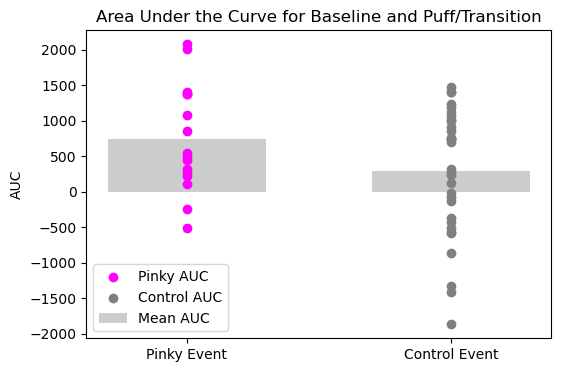

AUC values for Pinky: [2077.861625298342, 855.490259496463, -248.62736147357418, 481.9472349091858, 322.6019082171242, 2013.153987518654, 1410.0446654048335, 442.32375149818046, 1374.4596274012508, 281.149432899669, -506.0519969683342, 1087.5015596015933, 1374.9029969723922, 550.3690396327488, 103.32297402342519, 222.06969161914452]
AUC values for Control: [1121.0097515974876, -427.3940042152794, 1194.7018840452322, 740.8998260765202, 1477.3396940568216, 754.1679732968223, -1415.2969322112106, -574.6329491695374, 697.9641209582853, 238.2151974912065, 314.52805885534775, -127.06616335670329, 760.2062548432759, -368.3757601612758, 122.77253013926233, -589.5297305907161, 1400.403410268232, -1331.674192151725, 910.4011200246741, -1869.4814821775315, 1068.9742934084834, -858.43119369546, 998.7980503568115, 1410.5496561019463, 276.7133102829464, 848.4980786779777, -513.5559347061969, -74.06090616445108, 1229.8667367059466, 1007.7607222190933, 736.0943146177757, -24.113609128291543]


In [13]:
import numpy as np
import matplotlib.pyplot as plt

data = pinky_array

# Set parameters
bin_size = 1000  # Define the bin size in the same units as your time series
num_time_points = data.shape[1]
num_bins = num_time_points // bin_size
time_vector = np.arange(0, num_time_points)  # Time indices or timestamps

# Check the second dimension matches the length of time_vector
assert pinky_array.shape[1] == len(time_vector), "Mismatch in pinky_array and time_vector lengths"
assert control_array.shape[1] == len(time_vector), "Mismatch in control_array and time_vector lengths"

# Calculate AUC for each trial (e.g., between time = 5 and time = 7)#pre puff 2000 to 3000 airpuff 5000 7000 sDArken 6000 7000
AUC_pinky = []
AUC_control = []

# For each trial of Pinky event (time between 5 and 7)
time_selection_pinky = (time_vector > 6000) & (time_vector < 7000)
for trial in pinky_array:
    AUC_pinky.append(np.trapz(trial[time_selection_pinky]))

# For each trial of Control event (time between 0 and 2)
time_selection_control = (time_vector > 6000) & (time_vector < 7000)
for trial in control_array:
    AUC_control.append(np.trapz(trial[time_selection_control]))

# Calculate mean AUC for both Pinky and Control
mean_AUC_pinky = np.mean(AUC_pinky)
mean_AUC_control = np.mean(AUC_control)

# Plot the AUC as a bar chart with single values overlaid
plt.figure(figsize=(6, 4))
bar_positions = [0, 1]  # Positions for the bars (Pinky Event, Control Event)
bar_means = [mean_AUC_pinky, mean_AUC_control]

# Bar plot for mean AUC
plt.bar(bar_positions, bar_means, color=[.8, .8, .8], width=0.6, label="Mean AUC")

# Overlay individual AUC values (scatter plot)
plt.scatter([0]*len(AUC_pinky), AUC_pinky, color="magenta", zorder=3, label="Pinky AUC")
plt.scatter([1]*len(AUC_control), AUC_control, color="grey", zorder=3, label="Control AUC")

# Customize plot
plt.xticks(bar_positions, ['Pinky Event', 'Control Event'])
plt.ylabel('AUC')
plt.title('Area Under the Curve for Baseline and Puff/Transition')

# Add legend and show plot
plt.legend()
plt.show()

# Print the calculated AUC values
print("AUC values for Pinky:", AUC_pinky)
print("AUC values for Control:", AUC_control)

